In [126]:
import numpy as np
import pandas as pd

In [127]:
# loading the dataset
df = pd.read_csv("dataset.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [128]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [129]:
# checking for total number of missing values in each column of the DataFrame
df.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [130]:

# Mapping the 'sex' column values from string labels to numerical values
# 'male' is mapped to 0 and 'female' is mapped to 1

df["sex"] = df["sex"].map({'male':0, 'female':1})


Outliers detected in each feature:
bill_length_mm:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
bill_depth_mm:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
flipper_length_mm:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
body_mass_g:
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex
73             45.8           18.9              197.0      15000.0  0.0
206            46.5           14.4              217.0      12000.0  1.0
324            51.5           18.7              187.0      10000.0  0.0
sex:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


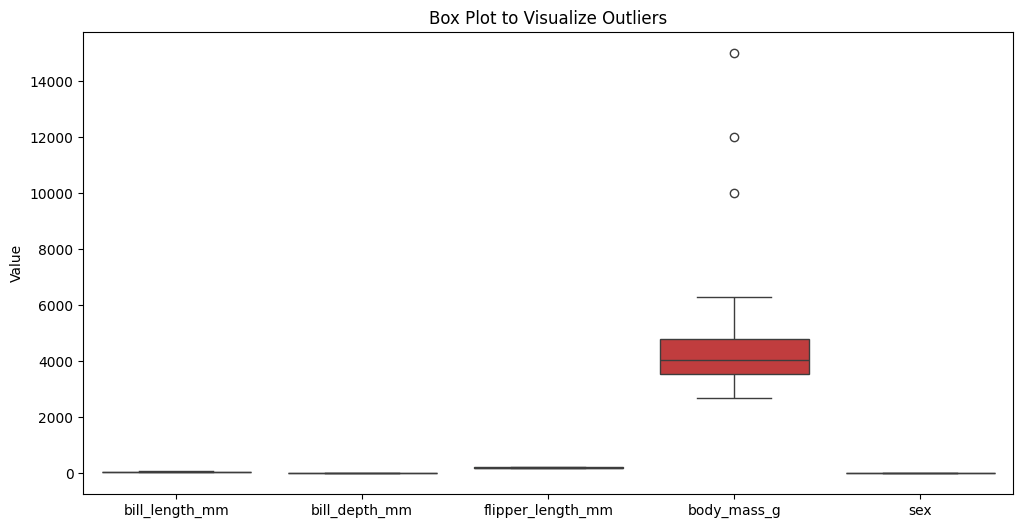

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    
    for column in df.columns:
        # Exclude null values when calculating quartiles
        non_null_data = df[column].dropna()
        
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = non_null_data.quantile(0.25)
        Q3 = non_null_data.quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers (including null check)
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

# Sample DataFrame (replace this with your actual DataFrame)

data = df.drop(columns=["species", "island"])
# Detect outliers (excluding species and island columns)
outliers = detect_outliers_iqr(data)
print("Outliers detected in each feature:")
for feature, outlier_data in outliers.items():
    print(f"{feature}:")
    print(outlier_data)

# Visualization using box plots (drop species, island columns and handle nulls)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.dropna())  # drop null values for visualization
plt.title('Box Plot to Visualize Outliers')
plt.ylabel('Value')
plt.show()


In [132]:
# I'm filling missing values in the specified columns with their mean or median.
# For 'bill_length_mm', 'bill_depth_mm', and 'flipper_length_mm', 
# I choose mean values since there are no outliers.
df["bill_length_mm"] = df["bill_length_mm"].fillna(df["bill_length_mm"].mean())
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(df["bill_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean())

# For 'body_mass_g', I prefer to use the median to fill null values due to the presence of outliers.
df["body_mass_g"] = df["body_mass_g"].fillna(df["body_mass_g"].median())

# Finally, I check for any remaining null values across the DataFrame.
print(df.isnull().sum())


species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  18
dtype: int64


Visualization of Data Distribution for Null Value Imputation in the 'Sex' Column

C:\Users\hp\AppData\Local\Temp\ipykernel_20132\82572391.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_distribution.index, y=sex_distribution.values, palette=custom_palette, ax=ax2, legend=False, width=0.4)


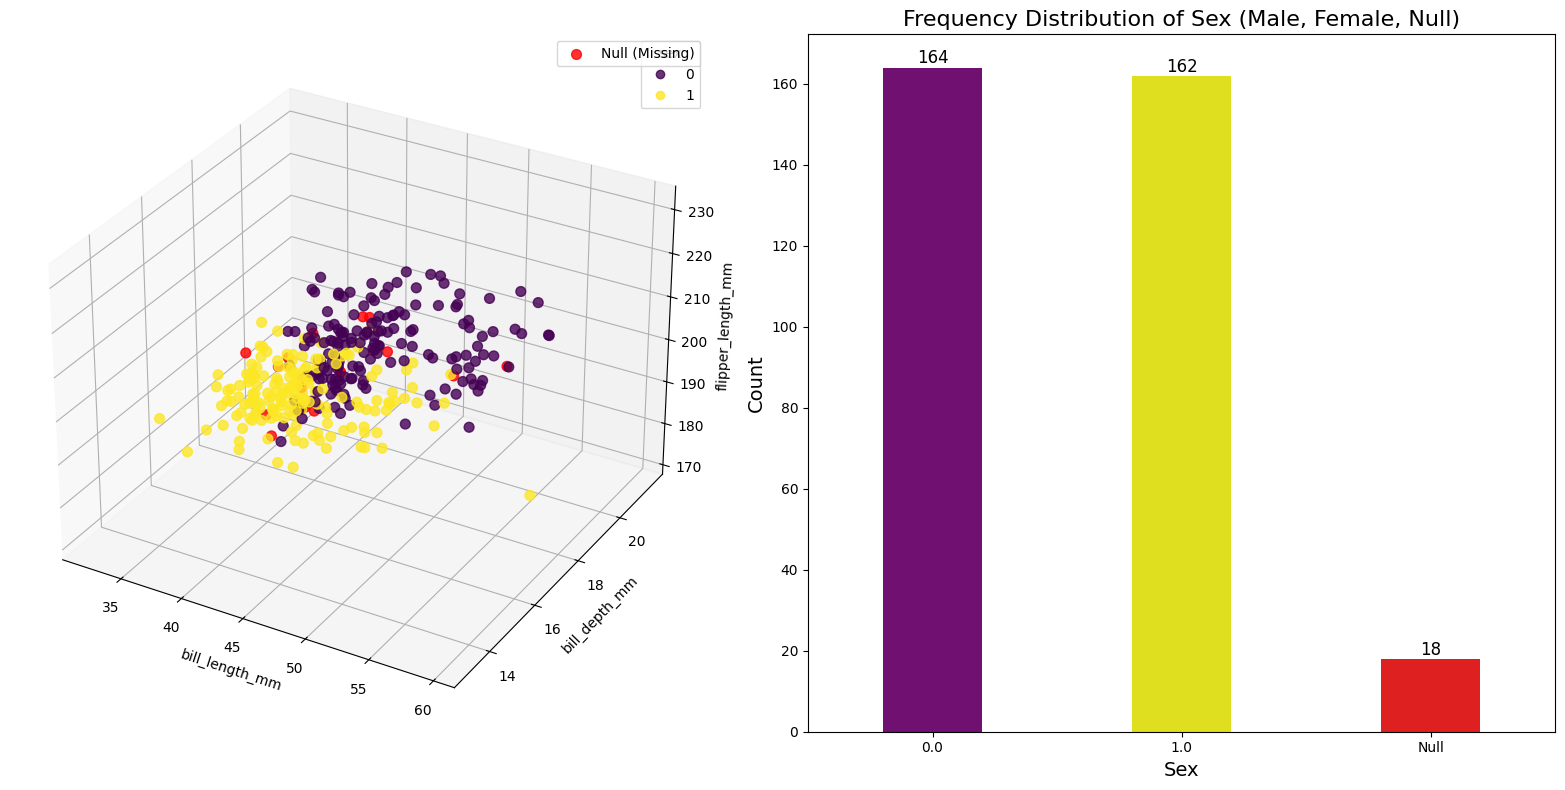

In [133]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def plot_combined_3d_and_bar(df, continuous_cols, target_col):
    # Extract the continuous columns and target
    x = df[continuous_cols[0]]
    y = df[continuous_cols[1]]
    z = df[continuous_cols[2]]
    
    target = df[target_col]
    is_null = target.isnull()

    # Create subplots: 1 row, 2 columns
    fig = plt.figure(figsize=(16, 8))
    
    # Subplot 1: 3D Scatter Plot
    ax1 = fig.add_subplot(121, projection='3d')
    
    # Plot points with non-null target
    non_null_scatter = ax1.scatter(
        x[~is_null], y[~is_null], z[~is_null], 
        c=target[~is_null].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.8
    )

    # Plot points with null target (different color)
    null_scatter = ax1.scatter(
        x[is_null], y[is_null], z[is_null], 
        c='red', s=50, alpha=0.8, label='Null (Missing)'
    )

    # Add axis labels for 3D plot
    ax1.set_xlabel(continuous_cols[0])
    ax1.set_ylabel(continuous_cols[1])
    ax1.set_zlabel(continuous_cols[2])

    # Add a legend for non-null
    legend1 = ax1.legend(*non_null_scatter.legend_elements(), title=target_col)
    ax1.add_artist(legend1)

    # Add a legend for the null values
    ax1.legend(loc="upper right")
    
    # Subplot 2: Bar Plot for Frequency Distribution of 'sex'
    ax2 = fig.add_subplot(122)

    # Get the frequency distribution of the 'sex' column (including NaN values)
    sex_distribution = df[target_col].value_counts(dropna=False)
    sex_distribution.index = sex_distribution.index.fillna('Null')  # Rename NaN for plot

    # Define a color palette mapping categories to specific colors
    custom_palette = {'1.0': 'yellow', '0.0': 'purple', 'Null': 'red'}

    # Create a bar plot with the custom colors
    sns.barplot(x=sex_distribution.index, y=sex_distribution.values, palette=custom_palette, ax=ax2, legend=False, width=0.4)

    # Add labels and title to bar plot
    ax2.set_xlabel('Sex', fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)
    ax2.set_title('Frequency Distribution of Sex (Male, Female, Null)', fontsize=16)

    # Display the count on top of each bar in the bar plot
    for i, value in enumerate(sex_distribution.values):
        ax2.text(i, value + 1, str(value), ha='center', fontsize=12)

    # Show the combined plot
    plt.tight_layout()
    plt.show()

# Example usage with your dataset
continuous_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']  # Replace with your column names
target_column = 'sex'  # The discrete column

plot_combined_3d_and_bar(df, continuous_columns, target_column)


In this analysis, I utilized a combined 3D scatter plot and bar plot to visualize the distribution of data points across three continuous features: bill length, bill depth, and flipper length. The 3D scatter plot highlights the relationship between these features, differentiating between data points with known values in the 'sex' column and those with null values.

The bar plot illustrates the frequency distribution of the 'sex' column, including the count of missing (null) values. This visualization aids in assessing whether methods like K-Nearest Neighbors (KNN) can be effectively employed for imputing the missing values in the 'sex' column. Based on the patterns observed in the data distribution, I proceeded to use KNN for filling the null values, leveraging the relationships between the continuous features.

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

features = df.drop(columns=["sex", "species", "island"])
target = df["sex"]

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(features[target.notnull()], target[target.notnull()])

missing_indices = target[target.isnull()].index
predicted_sex = knn.predict(features.loc[missing_indices])

df.loc[missing_indices, "sex"] = predicted_sex
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.70000,181.000000,3750.0,0.0
1,Adelie,Torgersen,39.500000,17.40000,186.000000,3800.0,1.0
2,Adelie,Torgersen,40.300000,18.00000,195.000000,3250.0,1.0
3,Adelie,Torgersen,43.876855,17.15117,200.915205,4050.0,0.0
4,Adelie,Torgersen,36.700000,19.30000,193.000000,3450.0,1.0


Q2: What is the average body_mass_g for Gentoo penguins? 

In [135]:
avg = df.loc[df["species"]=="Gentoo", "body_mass_g"].mean()
print(f"Average body_mass_g for Gentoo penguins: {avg}")

Average body_mass_g for Gentoo penguins: 5125.0


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

Skewness Results:
Adelie: {'bill_length_mm': 0.16253332755263664, 'bill_depth_mm': 0.3292094878226316}
Chinstrap: {'bill_length_mm': -0.09593592588668365, 'bill_depth_mm': 0.0067259608078862046}
Gentoo: {'bill_length_mm': 0.7123229012050285, 'bill_depth_mm': 0.33462250273877064}

Kurtosis Results:
Adelie: {'bill_length_mm': -0.22810386996708987, 'bill_depth_mm': -0.1010716144438022}
Chinstrap: {'bill_length_mm': -0.12401146170151378, 'bill_depth_mm': -0.898739653084359}
Gentoo: {'bill_length_mm': 1.1476469434705479, 'bill_depth_mm': -0.6111262891198344}


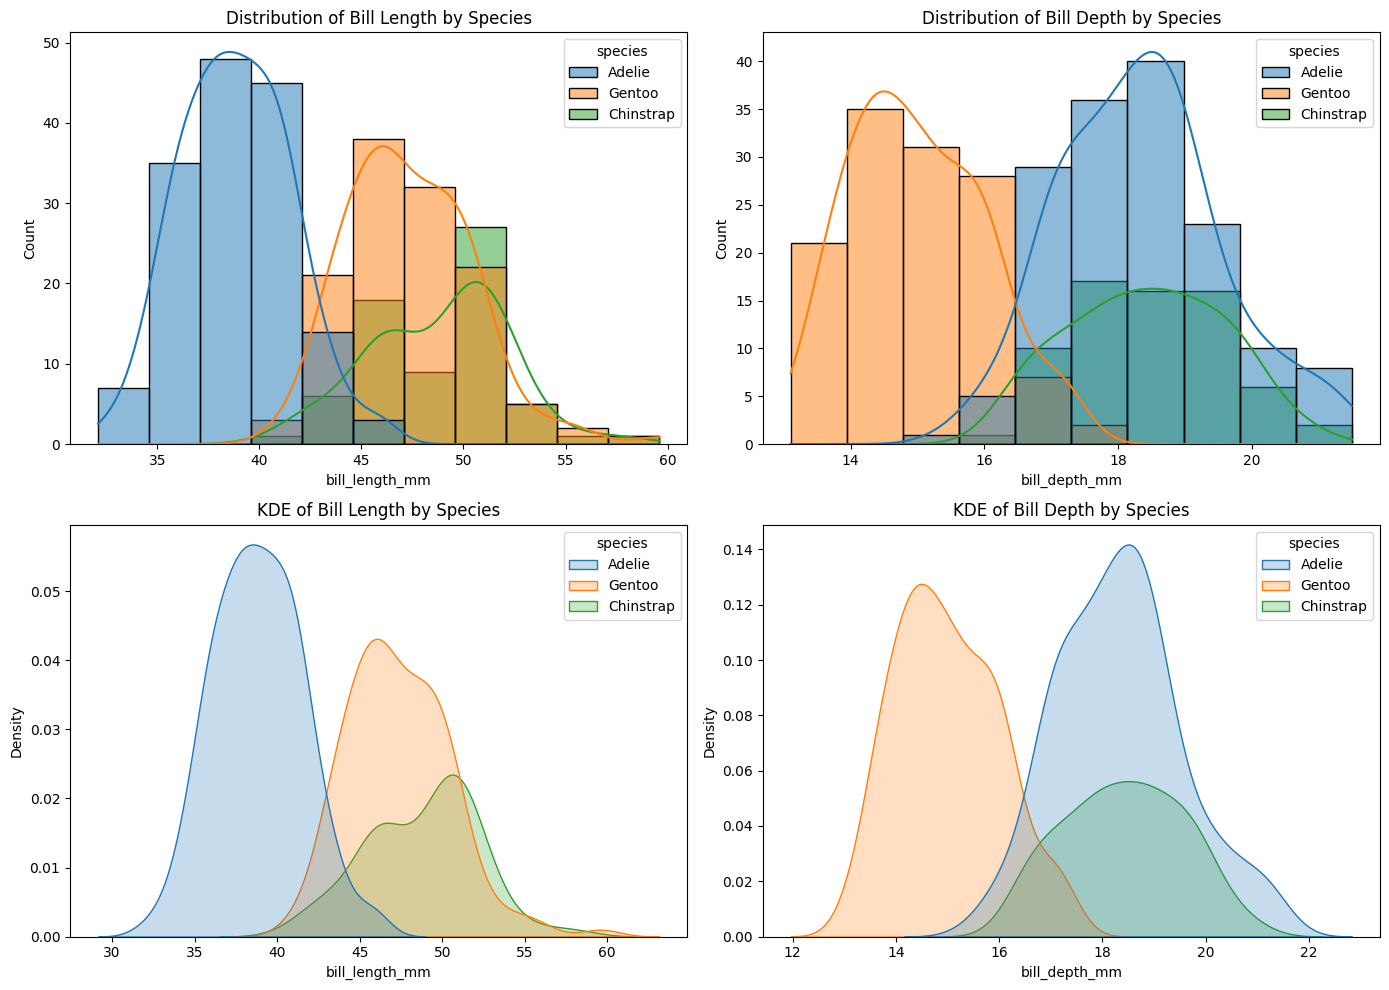

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Group by species and calculate skewness and kurtosis
species_groups = df.groupby("species")

# Initialize dictionaries to store skewness and kurtosis
skewness_results = {}
kurtosis_results = {}

for species, group in species_groups:
    skewness_results[species] = {
        "bill_length_mm": skew(group["bill_length_mm"].dropna()),  # Drop NaN for calculations
        "bill_depth_mm": skew(group["bill_depth_mm"].dropna())
    }
    kurtosis_results[species] = {
        "bill_length_mm": kurtosis(group["bill_length_mm"].dropna()),
        "bill_depth_mm": kurtosis(group["bill_depth_mm"].dropna())
    }

# Display skewness and kurtosis results
print("Skewness Results:")
for species, values in skewness_results.items():
    print(f"{species}: {values}")

print("\nKurtosis Results:")
for species, values in kurtosis_results.items():
    print(f"{species}: {values}")

# Visualizing the distributions using histograms and density plots
plt.figure(figsize=(14, 10))

# Histograms of bill_length_mm
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="bill_length_mm", hue="species", kde=True)
plt.title('Distribution of Bill Length by Species')

# Histograms of bill_depth_mm
plt.subplot(2, 2, 2)
sns.histplot(data=df, x="bill_depth_mm", hue="species", kde=True)
plt.title('Distribution of Bill Depth by Species')

# KDE plots for a better look at the distribution
plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x="bill_length_mm", hue="species", fill=True)
plt.title('KDE of Bill Length by Species')

plt.subplot(2, 2, 4)
sns.kdeplot(data=df, x="bill_depth_mm", hue="species", fill=True)
plt.title('KDE of Bill Depth by Species')

plt.tight_layout()
plt.show()


Skewness Results:
Adelie:

bill_length_mm: 0.16 (slight right skew)
bill_depth_mm: 0.33 (moderate right skew)
Interpretation: Both measurements for Adelie penguins are slightly to moderately right-skewed, indicating that most penguins have shorter bills, with a few individuals having longer bills.

Chinstrap:

bill_length_mm: -0.096 (approximately symmetrical)
bill_depth_mm: 0.007 (approximately symmetrical)
Interpretation: Chinstrap penguins exhibit nearly symmetrical distributions for both measurements, indicating a balanced spread around the mean.

Gentoo:

bill_length_mm: 0.71 (moderate right skew)
bill_depth_mm: 0.33 (moderate right skew)
Interpretation: Gentoo penguins show moderate right skew for both bill length and bill depth, suggesting that most individuals have shorter bills with a few having significantly longer bills.

2. Kurtosis Analysis
Kurtosis measures the tails' heaviness in the distribution.
A kurtosis value of 0 indicates a normal distribution.
Positive kurtosis (>0) indicates heavy tails (leptokurtic), while negative kurtosis (<0) indicates light tails (platykurtic).
Kurtosis Results:
Adelie:

bill_length_mm: -0.23 (light tails)
bill_depth_mm: -0.10 (light tails)
Interpretation: Adelie penguins have light tails for both bill measurements, suggesting that extreme values (either very high or very low) are less frequent.

Chinstrap:

bill_length_mm: -0.12 (light tails)
bill_depth_mm: -0.90 (very light tails)
Interpretation: Chinstrap penguins show light tails for bill length and very light tails for bill depth, indicating a relatively flat distribution with fewer extreme values.

Gentoo:

bill_length_mm: 1.15 (heavy tails)
bill_depth_mm: -0.61 (light tails)
Interpretation: Gentoo penguins exhibit heavy tails for bill length, indicating that there are more extreme values than what is typically found in a normal distribution. However, for bill depth, they show light tails, suggesting a flatter distribution.

Summary
Adelie: Slightly to moderately right-skewed distributions, light tails for both features.
Chinstrap: Approximately symmetrical distributions, with light tails.
Gentoo: Moderate right skew for bill measurements, heavy tails for bill length, and light tails for bill depth.


Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

Outliers detected in each feature:
bill_length_mm:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
bill_depth_mm:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
flipper_length_mm:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
body_mass_g:
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex
73             45.8           18.9              197.0      15000.0  0.0
206            46.5           14.4              217.0      12000.0  1.0
324            51.5           18.7              187.0      10000.0  0.0
sex:
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


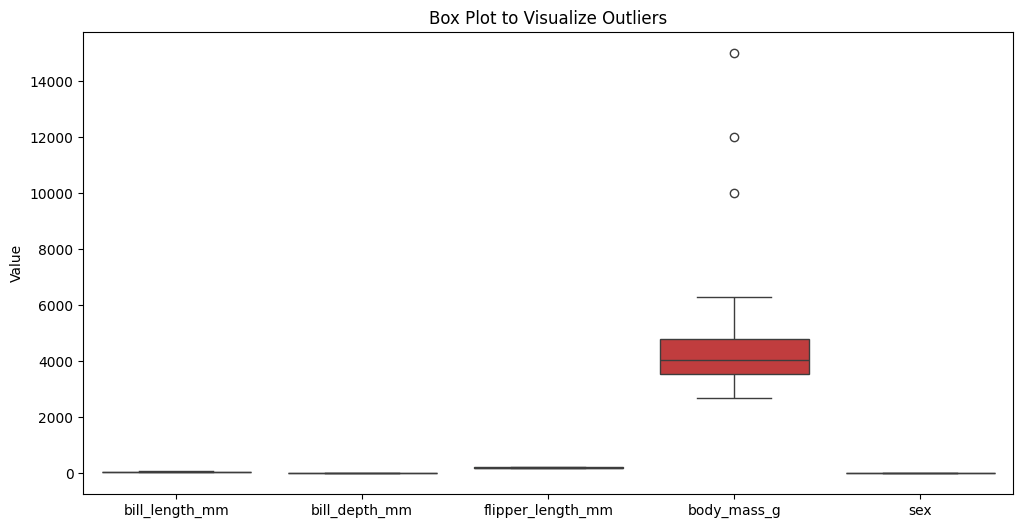

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr(df):
    outliers = {}
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

# Detect outliers
data = df.drop(columns=["species", "island"])
outliers = detect_outliers_iqr(data)
print("Outliers detected in each feature:")
for feature, outlier_data in outliers.items():
    print(f"{feature}:")
    print(outlier_data)

# Visualization using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot to Visualize Outliers')
plt.ylabel('Value')
plt.show()

In this analysis, I employed the Interquartile Range (IQR) method to detect outliers in the dataset features. The IQR is a measure of statistical dispersion calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Outliers are defined as observations that fall below Q1−1.5×IQR or above Q3+1.5×IQR, indicating that these values are significantly different from the majority of the data. 
To visualize the outliers, I used a box plot, which displays the median, quartiles, and any potential outliers, allowing for a clear understanding of the data distribution.



Outliers were present only in the body_mass_g feature, while no outliers were detected in the other continuous features.

Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

In [138]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def get_components_for_variance(data, target_variance=0.98):
    # Step 1: Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Step 2: Apply PCA without specifying the number of components
    pca = PCA()
    pca.fit(data_scaled)

    # Step 3: Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # Step 4: Find the number of components that explain the target variance
    num_components = np.argmax(cumulative_variance >= target_variance) + 1

    print(f"Number of components to retain {target_variance*100}% variance: {num_components}")
    return num_components

# Assuming 'data' is your pandas DataFrame with numerical features
data = df.drop(columns=["species", "island"])
numerical_data = data.select_dtypes(include=[np.number])
n_components = get_components_for_variance(numerical_data, target_variance=0.98)


Number of components to retain 98.0% variance: 5


In this analysis, I utilized Principal Component Analysis (PCA) to reduce the dimensionality of the dataset for better visualization, despite having only a few columns and not facing the curse of dimensionality.

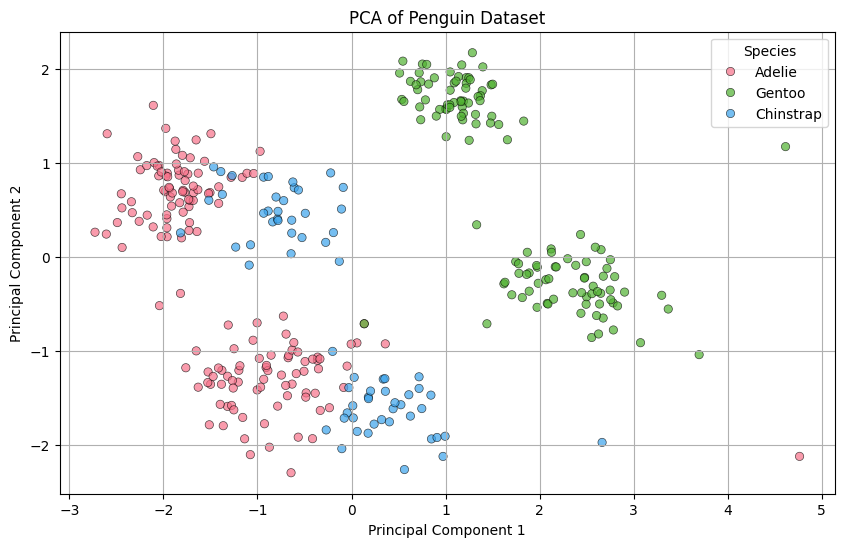

Explained variance by each component: [0.50970885 0.28051094]


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Assuming df is your original DataFrame
data = df.drop(columns=["species", "island"])

# Step 2: Standardize the Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(data_scaled)

# Step 4: Create a DataFrame with the principal components and original species and island columns
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']  # Add species column
pca_df['island'] = df['island']      # Add island column

# Step 5: Visualize the PCA result
plt.figure(figsize=(10, 6))

# Use seaborn for coloring based on species
palette = sns.color_palette("husl", len(pca_df['species'].unique()))  # Color palette for species
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette=palette, alpha=0.7, edgecolor='k')

plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend(title='Species')
plt.show()

# Step 6: Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


I applied PCA to reduce the data down to two principal components (PC1 and PC2). This reduction allows for visualizing the data in a two-dimensional space, making it easier to interpret patterns and relationships among the data points.

Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

C:\Users\hp\AppData\Local\Temp\ipykernel_20132\2495334548.py:56: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


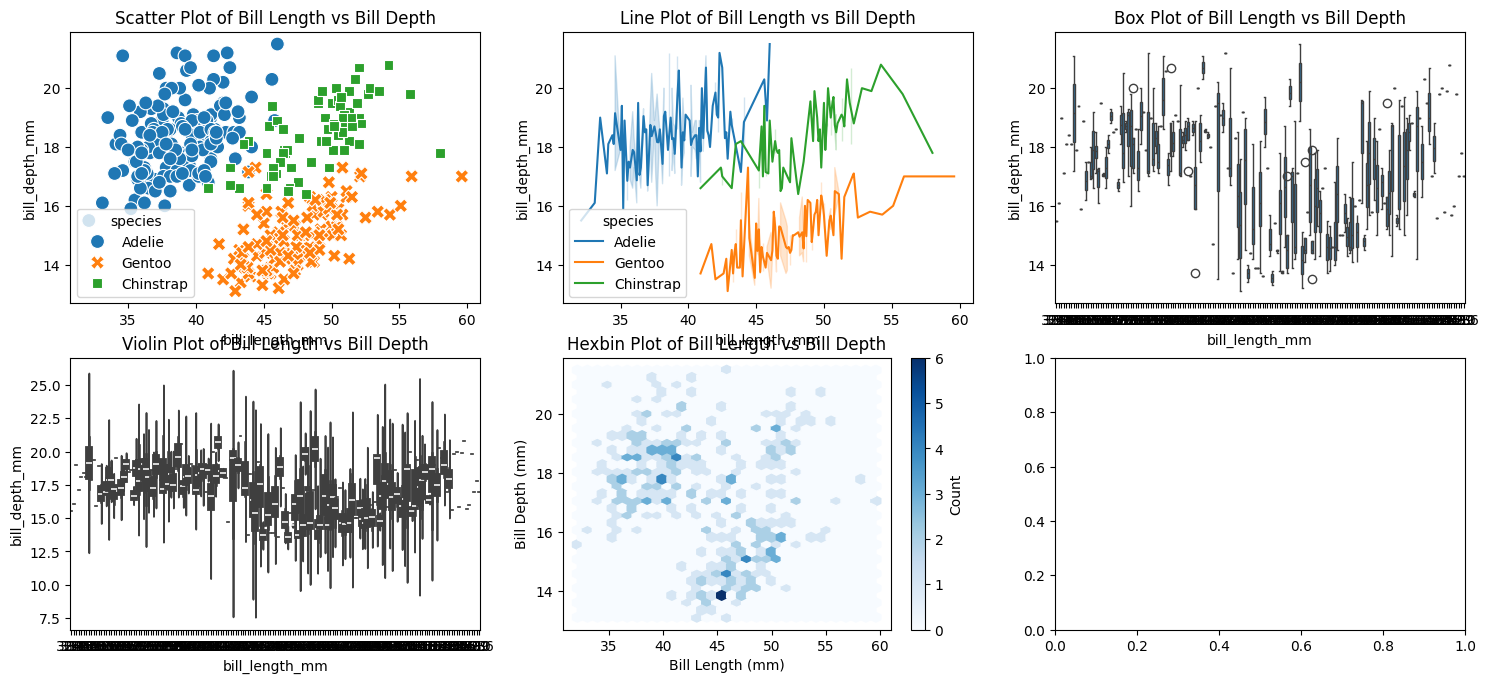

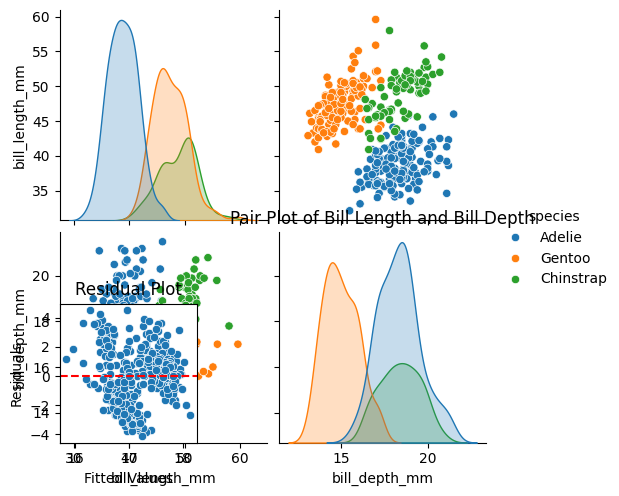

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(18, 12))

# 1. Scatter Plot
plt.subplot(3, 3, 1)
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', s=100)
plt.title('Scatter Plot of Bill Length vs Bill Depth')

# 2. Line Plot
plt.subplot(3, 3, 2)
sns.lineplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', markers=True)
plt.title('Line Plot of Bill Length vs Bill Depth')

# 3. Box Plot
plt.subplot(3, 3, 3)
sns.boxplot(x='bill_length_mm', y='bill_depth_mm', data=df)
plt.title('Box Plot of Bill Length vs Bill Depth')

# 4. Violin Plot
plt.subplot(3, 3, 4)
sns.violinplot(x='bill_length_mm', y='bill_depth_mm', data=df)
plt.title('Violin Plot of Bill Length vs Bill Depth')

# 5. Hexbin Plot
plt.subplot(3, 3, 5)
plt.hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# 6. Pair Plot
plt.subplot(3, 3, 6)
sns.pairplot(df, hue='species', vars=['bill_length_mm', 'bill_depth_mm'])
plt.title('Pair Plot of Bill Length and Bill Depth')

# 7. Residual Plot (Using Linear Regression)
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Fit the model
model = ols('bill_depth_mm ~ bill_length_mm', data=df).fit()
residuals = model.resid

plt.subplot(3, 3, 7)
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [141]:

# Group by species and island, then find the maximum flipper length
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

print(max_flipper_length)


     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


In [142]:

# Group by species and island, then find the maximum flipper length
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Identify which species has the longest flippers on each island
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

print(longest_flippers)


     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


Q8: Perform z-score normalization on this dataset. (code)

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.882230,0.787743,-1.422488,3750.0,0.0
1,Adelie,Torgersen,-0.808355,0.126556,-1.065352,3800.0,1.0
2,Adelie,Torgersen,-0.660604,0.431719,-0.422507,3250.0,1.0
3,Adelie,Torgersen,0.000000,0.000000,0.000000,4050.0,0.0
4,Adelie,Torgersen,-1.325483,1.092905,-0.565361,3450.0,1.0
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,2.202069,1.347208,0.434620,4000.0,0.0
340,Chinstrap,Dream,-0.069601,0.482580,0.077484,3400.0,1.0
341,Chinstrap,Dream,1.056999,0.533440,-0.565361,3775.0,0.0
342,Chinstrap,Dream,1.278626,0.940324,0.648902,4100.0,0.0
